# Bank Marketing Campaign Project

### Problem Definition

Portuguese bank is having a decrease in its revenue. The bank wants to be able to predict which clients are most likely to subscribe a term deposit so they can focus marketing efforts and resources on them and avoid wasting money and time on clients that will probably not subscribe. 

### Importing Libraries

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Loading Data

In [3]:
train = pd.read_excel('../Data/bank-additional-full.xlsx')
train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
test = pd.read_excel('../Data/bank-additional.xlsx')
test.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Data Understanding

In [5]:
print("The shape of the train data is:" + str(train.shape))
print("The shape of the test data is:" + str(test.shape))

The shape of the train data is:(41188, 21)
The shape of the test data is:(4119, 21)


In [6]:
#Checking if there are null values and each feature's type.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#Checking numerical parameters:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
#Checking of there are any null values at any feature column.
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#Let's check which are the features with categories (object type)
train.select_dtypes(object).head(1)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no


In [11]:
#Let's check the categories in each of those features

print("Job:", train.job.value_counts(),sep = '\n')
print("-"*50)
print("Marital status:", train.marital.value_counts(), sep = '\n')
print("-"*50)
print("Education:", train.education.value_counts(), sep = '\n')
print("-"*50)
print("Default credit:", train.default.value_counts(), sep = '\n')
print("-"*50)
print("Housing loan:", train.housing.value_counts(), sep = '\n')
print("-"*50)
print("Personal Loan:", train.loan.value_counts(), sep = '\n')
print("-"*50)
print("Contact method:", train.contact.value_counts(), sep = '\n')
print("-"*50)
print("Month:", train.month.value_counts(), sep = '\n')
print("-"*50)
print("Day_of_week:", train.day_of_week.value_counts(), sep = '\n')
print("-"*50)
print("Previous outcome:", train.poutcome.value_counts(), sep = '\n')
print("-"*50)
print("Outcome in this campaign:", train.y.value_counts(), sep = '\n')


Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------
Marital status:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------------------------
Default credit:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--------------------------------------------------
Housing

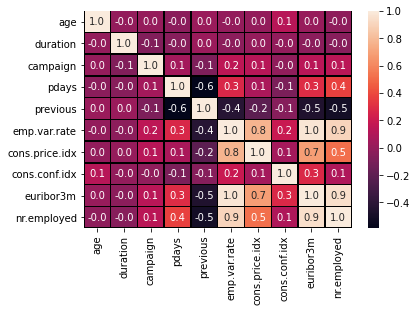

In [12]:
sns.heatmap(train.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")
plt.show()


Number of employees rate is highly correlated with employee variation rate

Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate)

Employee variation rate also correlates with the bank interest rates

### *Looking for outliers in Age, Duration and Campaign*

In [13]:
#Outliers in Age

stat1= train['age'].describe()
print(stat1)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [14]:
IQR = stat1['75%']-stat1['25%']
upper = stat1['75%'] + 1.5*IQR
lower = stat1['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 69.5 and 9.5.


Text(0, 0.5, 'Age')

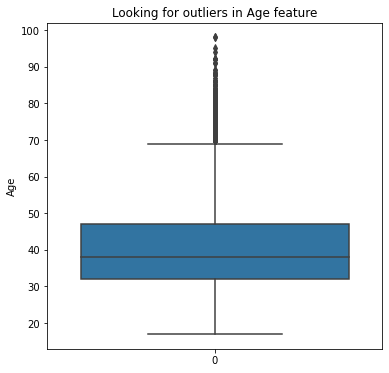

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train['age'])
plt.title('Looking for outliers in Age feature')
plt.ylabel('Age')

As the minimum number is 17 there is no need to look for the outliers below 9.5

In [17]:
train[train['age'] > 69.5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 469 calls made to people older than 70 years old , which we can consider our outliers in Age, but it is possible that calls have been made to these people, as the oldest seems to have 98 years old. It looks rare but not impossible so we will not drop these outliers because some of them had positive outcome and they subscribed a term deposit.

In [19]:
#Outliers in Duration

stat2= train['duration'].describe()
print(stat2)

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [20]:
IQR = stat2['75%']-stat2['25%']
upper = stat2['75%'] + 1.5*IQR
lower = stat2['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 644.5 and -223.5.


Text(0, 0.5, 'Duration')

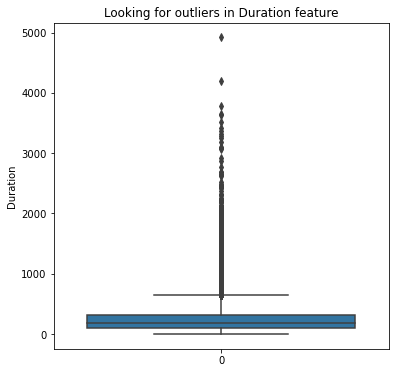

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train['duration'])
plt.title('Looking for outliers in Duration feature')
plt.ylabel('Duration')

As the min number is 0 there is no need to look for outliers below -223.5

In [25]:
train[train['duration'] > 644.5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57,45,services,married,high.school,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
61,51,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,single,professional.course,no,yes,no,cellular,nov,fri,...,2,19,1,success,-1.1,94.767,-50.8,1.040,4963.6,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,...,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes


2963 calls lasted more than 644 seconds (10.7 minutes), with a maximum value of 4918 secondas (82 minutes). We will not drop this outliers because 82 minutes seems like a possible duration for a call with a positive subscription result.

In [26]:
#Outliers in Campaign

stat3= train['campaign'].describe()
print(stat3)

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


In [27]:
IQR = stat3['75%']-stat3['25%']
upper = stat3['75%'] + 1.5*IQR
lower = stat3['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 6.0 and -2.0.


Text(0, 0.5, 'Campaign')

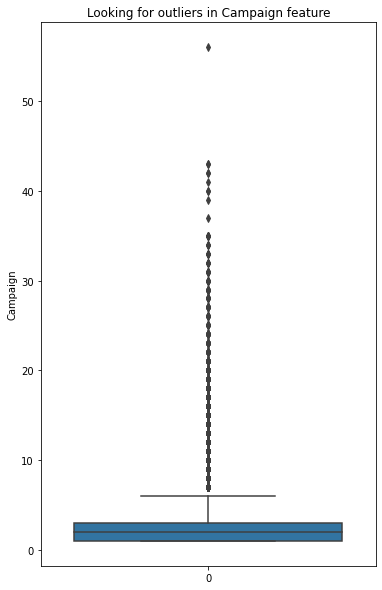

In [25]:
plt.figure(figsize=(6,10))
sns.boxplot(data=train['campaign'])
plt.title('Looking for outliers in Campaign feature')
plt.ylabel('Campaign')

As the minimun number is 1 there is no need to look for outliers below -2.

In [28]:
train[train['campaign'] > 6]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1043,41,technician,single,university.degree,unknown,no,no,telephone,may,wed,...,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,...,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1097,51,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,retired,married,basic.9y,no,no,no,telephone,sep,fri,...,9,999,1,failure,-1.1,94.199,-37.5,0.883,4963.6,no
40631,88,retired,married,basic.4y,no,yes,no,cellular,sep,mon,...,7,999,0,nonexistent,-1.1,94.199,-37.5,0.882,4963.6,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,...,7,3,5,success,-1.1,94.199,-37.5,0.879,4963.6,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,...,9,999,2,failure,-1.1,94.199,-37.5,0.879,4963.6,no


5.8% of clients were called more than 6 times during this campaign.

### Data Cleaning and Transformation

We will work with outliers normally

Let's used the most frequent value to replace each of the unknown values in categorical features. Then we will be ready to encode them.

First, lets replace the unknown values with NaN so they can fit in our following function

In [ ]:
def replace_with_frequent(df,col):
    frequent = df[col].value_counts().idxmax()
    print("The most frequent value is:", frequent)
    df[col].replace(np.nan, frequent , inplace = True)
    print("Replacing missing values with the most frequent value:", frequent)